# Let's explore EXFOR offerings for Ca48

In [3]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
Ca40 = (40, 20)

In [18]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=Ca40,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)


In [17]:
# these are considered outliers or not useful
entries_to_ignore = ['O0253', 'C0078', 'O0365']
for entry in entries_to_ignore:
    del all_entries_pp[entry]

In [19]:
all_entries_pp

{'C0076': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78780d1c1590>,
 'C0624': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812a7da50>,
 'C0893': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78781008ecd0>,
 'E0166': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811733050>,
 'E0249': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811733d10>,
 'E0795': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78780d0632d0>,
 'O0032': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811eec350>,
 'O0049': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812365010>,
 'O0142': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787810661890>,
 'O0208': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787810776910>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811528650>,
 'O0254': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812e140d0>,
 'O0352': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812f2aa10>,

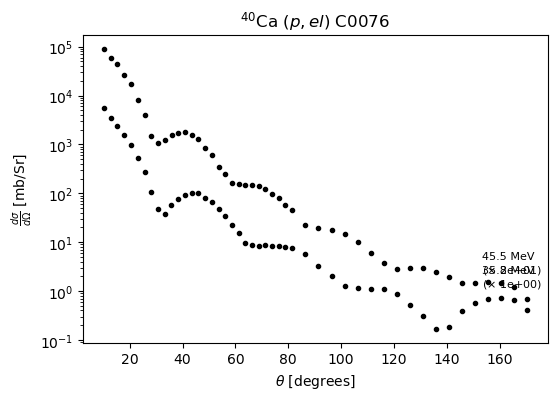

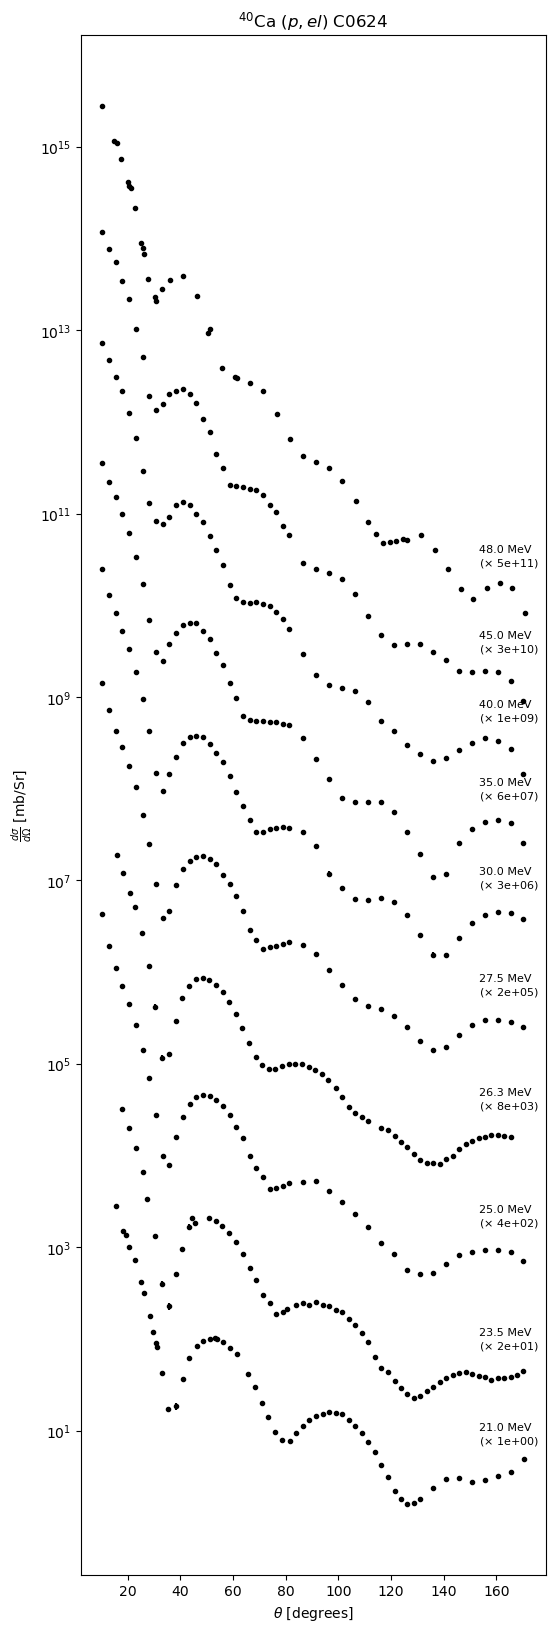

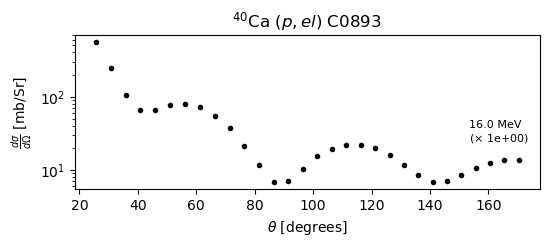

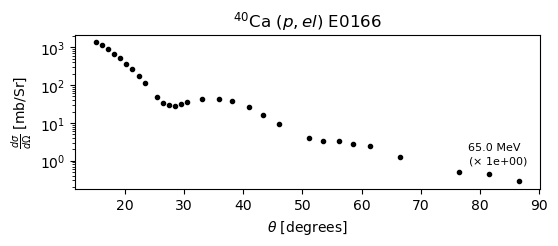

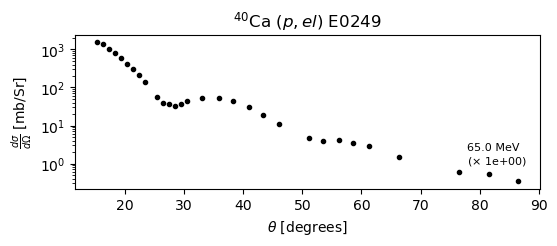

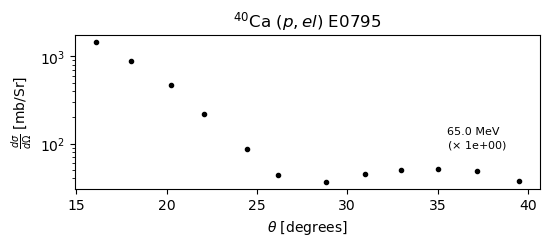

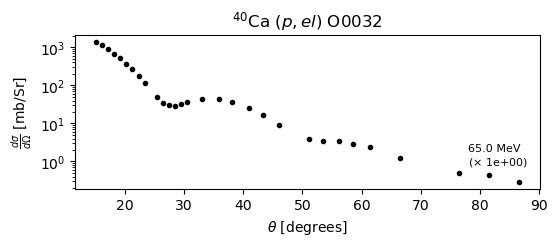

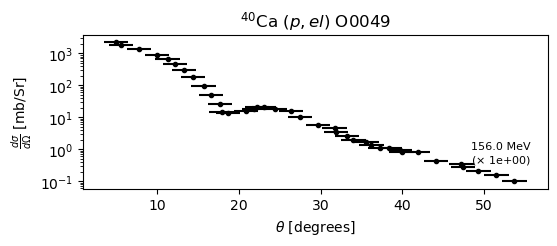

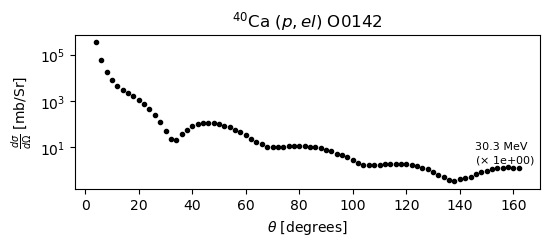

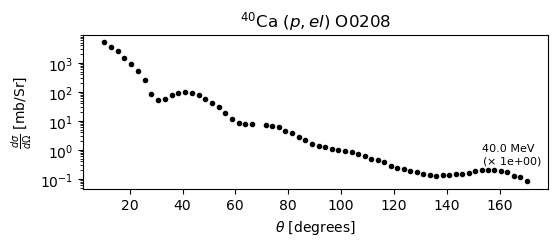

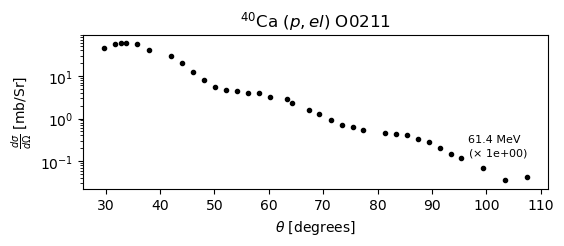

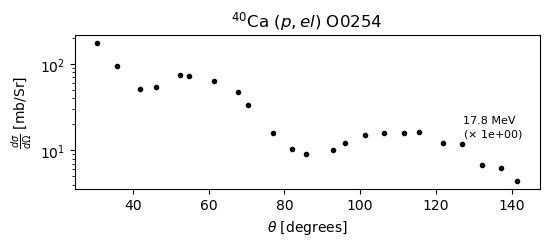

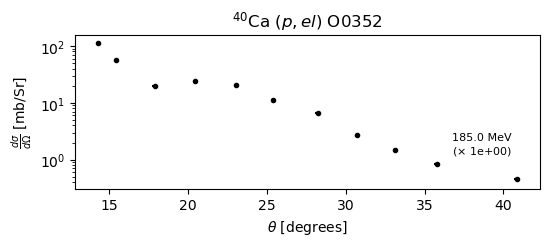

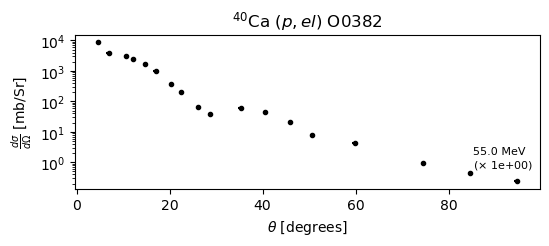

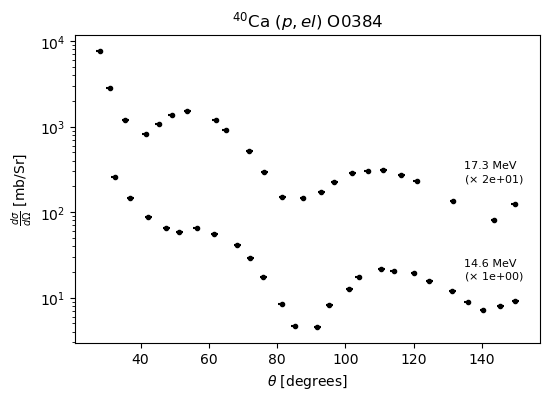

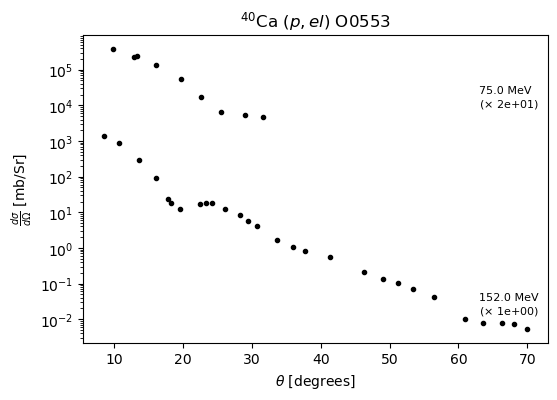

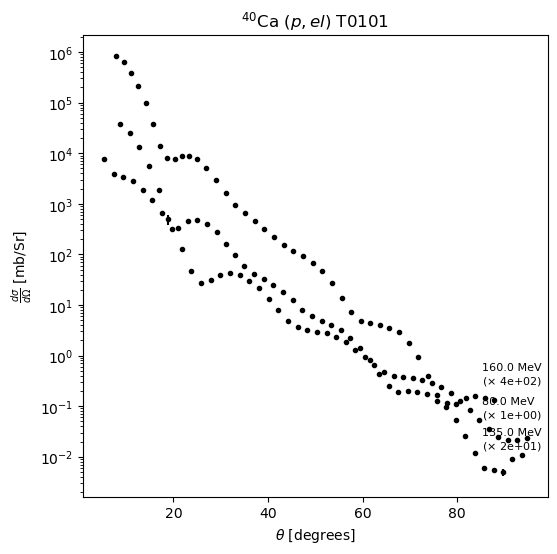

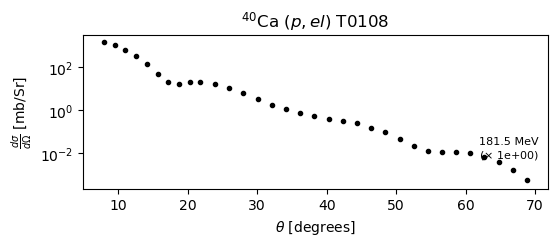

In [20]:
for entry, data in all_entries_pp.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [23]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=Ca40,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

There was an error reading entry F0896, it will be skipped:
Missing 'Angle' field!


In [24]:
all_entries_pp_ruth

{'E0120': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811c23e90>,
 'E1677': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787810fc5410>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787810b0d210>,
 'O0239': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787810f7da10>,
 'O0253': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812e083d0>,
 'O0302': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78780c96cad0>,
 'O0328': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78780d018650>,
 'O1199': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787812ca5050>}

In [26]:
# these are considered outliers or not useful
entries_to_ignore = ['O0253']
for entry in entries_to_ignore:
    del all_entries_pp_ruth[entry]

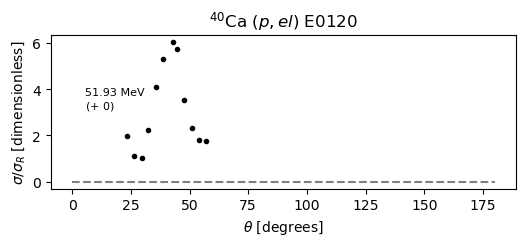

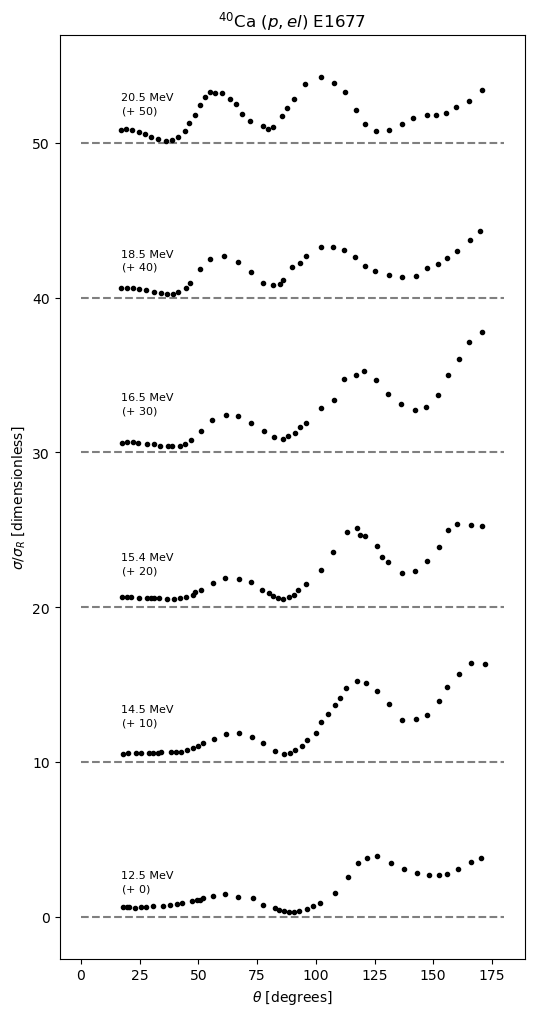

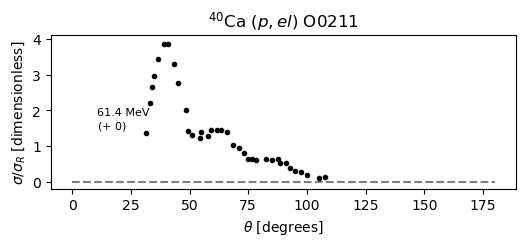

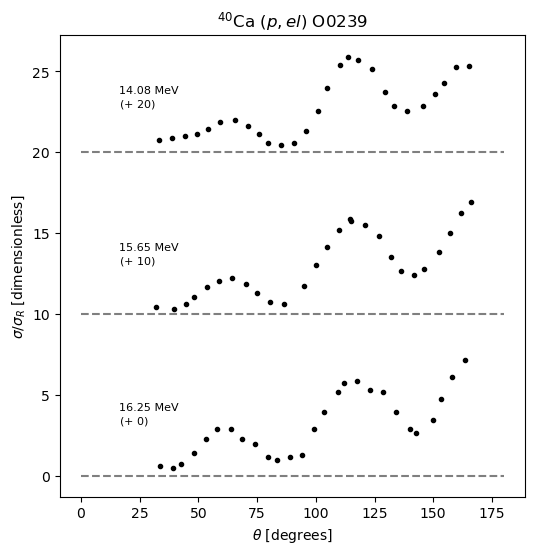

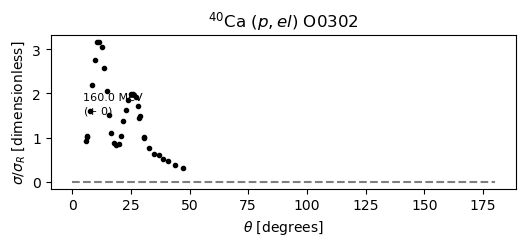

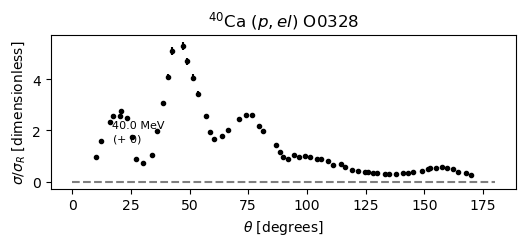

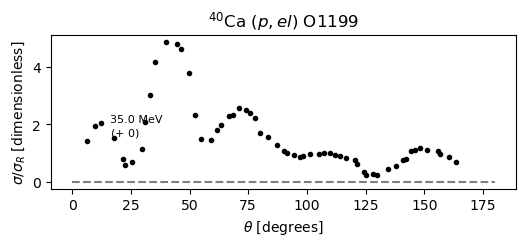

In [27]:
for entry, data in all_entries_pp_ruth.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
             ax,
        xlim=None,
        offsets=10,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.1,
        label_offset_factor=0.1,
        log=False,
        add_baseline=True,
    )
    ax.set_title(f"{data.fancy_label} {entry}")

In [28]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=Ca40,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [30]:
all_entries_nn

{'11611': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811f05850>,
 '12785': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811f05390>,
 '12996': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7878101410d0>,
 '13946': <exfor_tools.exfor_tools.ExforDifferentialData at 0x787811415290>,
 '14303': <exfor_tools.exfor_tools.ExforDifferentialData at 0x78781203be50>}

In [32]:
# these are considered outliers or not useful
entries_to_ignore = ['11611', '14303']
for entry in entries_to_ignore:
    del all_entries_nn[entry]

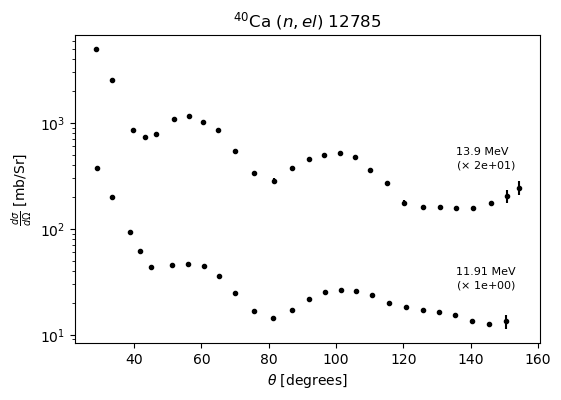

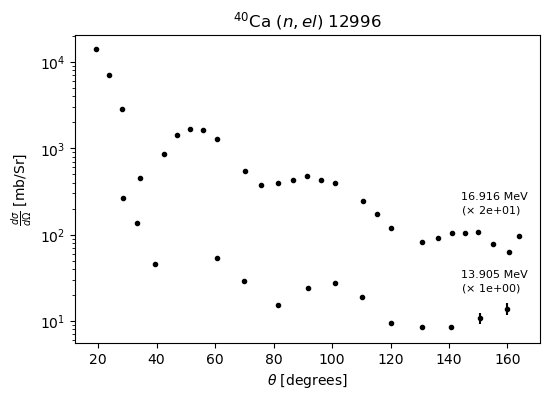

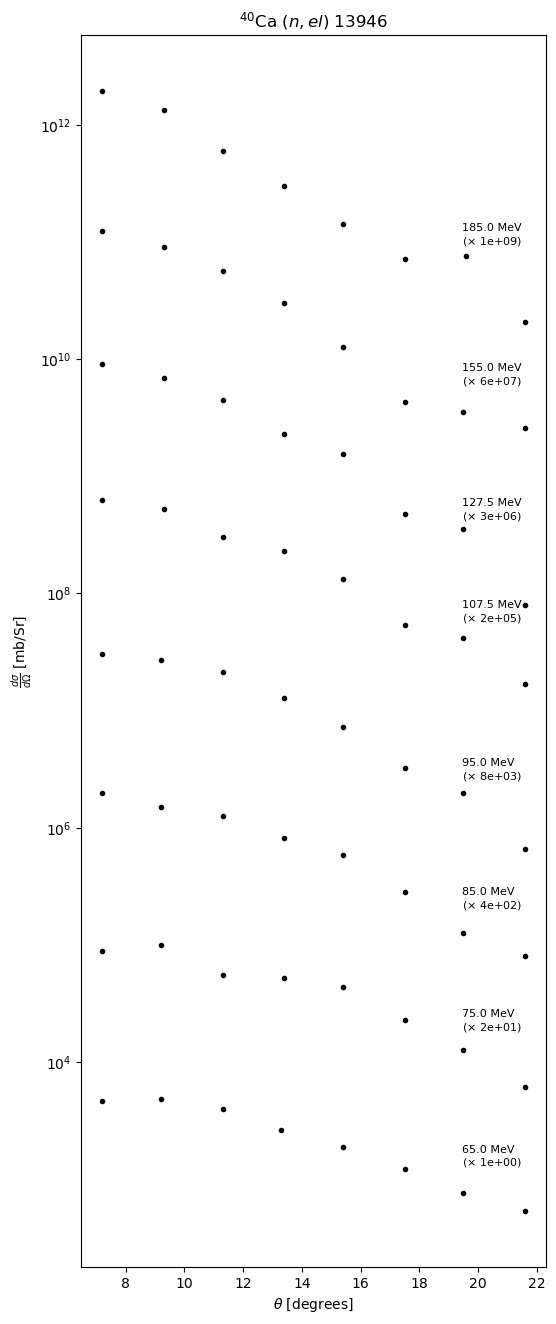

In [33]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=20,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    ax.set_title(f"{data.fancy_label} {entry}")